In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [235]:
data = pd.read_csv("D:\\datas\Bank_Personal_Loan_Modelling.csv")
data

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1/60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1/50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1/00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2/70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1/00,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1/90,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0/40,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0/30,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0/50,2,0,0,0,0,1,0


In [236]:
df = pd.DataFrame(data)
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1/60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1/50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1/00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2/70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1/00,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1/90,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0/40,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0/30,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0/50,2,0,0,0,0,1,0


In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  5000 non-null   int64 
 1   Age                 5000 non-null   int64 
 2   Experience          5000 non-null   int64 
 3   Income              5000 non-null   int64 
 4   ZIP Code            5000 non-null   int64 
 5   Family              5000 non-null   int64 
 6   CCAvg               5000 non-null   object
 7   Education           5000 non-null   int64 
 8   Mortgage            5000 non-null   int64 
 9   Personal Loan       5000 non-null   int64 
 10  Securities Account  5000 non-null   int64 
 11  CD Account          5000 non-null   int64 
 12  Online              5000 non-null   int64 
 13  CreditCard          5000 non-null   int64 
dtypes: int64(13), object(1)
memory usage: 547.0+ KB


In [238]:
df.describe(include='all')

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,108,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,0/30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,241,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,NaN,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,NaN,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,NaN,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,NaN,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000


In [239]:
# check for null values
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [240]:
# check the correct name of the columns
df.columns.tolist()

['ID',
 'Age',
 'Experience',
 'Income',
 'ZIP Code',
 'Family',
 'CCAvg',
 'Education',
 'Mortgage',
 'Personal Loan',
 'Securities Account',
 'CD Account',
 'Online',
 'CreditCard']

In [241]:
# Delete ID columns
df.drop('ID', axis=1, inplace=True)
df

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1/60,1,0,0,1,0,0,0
1,45,19,34,90089,3,1/50,1,0,0,1,0,0,0
2,39,15,11,94720,1,1/00,1,0,0,0,0,0,0
3,35,9,100,94112,1,2/70,2,0,0,0,0,0,0
4,35,8,45,91330,4,1/00,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,92697,1,1/90,3,0,0,0,0,1,0
4996,30,4,15,92037,4,0/40,1,85,0,0,0,1,0
4997,63,39,24,93023,2,0/30,3,0,0,0,0,0,0
4998,65,40,49,90034,3,0/50,2,0,0,0,0,1,0


In [242]:
# Replace '/' with decimal point
df['CCAvg'] = df['CCAvg'].str.replace('/', '.')

# Convert the column to float
df['CCAvg'] = df['CCAvg'].astype(float)

In [243]:
df

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [244]:
df.dtypes

Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [245]:
discrete_col = df[['Family','Education','Securities Account','CD Account','Online','CreditCard','Personal Loan']]
continues_col = df[['Age','Experience','Income','CCAvg','Mortgage']]

Family :  [4 3 1 2]
Education :  [1 2 3]
Securities Account :  [1 0]
CD Account :  [0 1]
Online :  [0 1]
CreditCard :  [0 1]
Personal Loan :  [0 1]


D:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

D:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_6996\3818327469.py:5: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



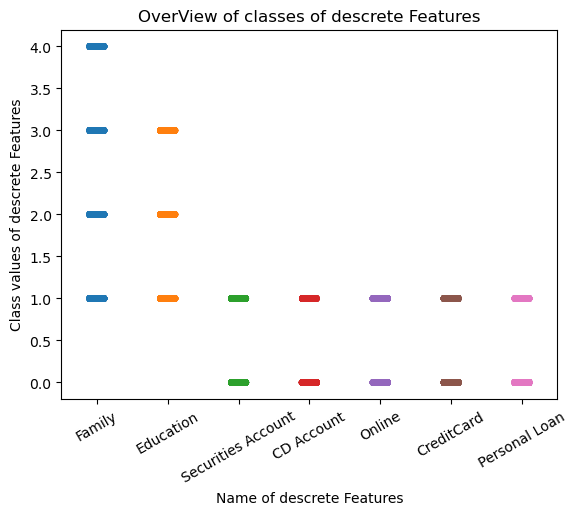

In [246]:
for col in discrete_col :
    print('%s : ' %col , df[col].unique())
    
ax = sns.stripplot(data=discrete_col)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.ylabel('Class values of descrete Features')
plt.xlabel('Name of descrete Features')
plt.title('OverView of classes of descrete Features')
plt.show()

#### As shown above there are 6 features which are descrete
    - Family can be included 1 person at least and 4 persons at most
    - Education is in 3 levels
    - the rest 4 features are binary features and are 0/1 means No/Yes

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0


D:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

D:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_6996\3199983124.py:3: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



Text(0.5, 1.0, 'OverView of Range of Continues Features')

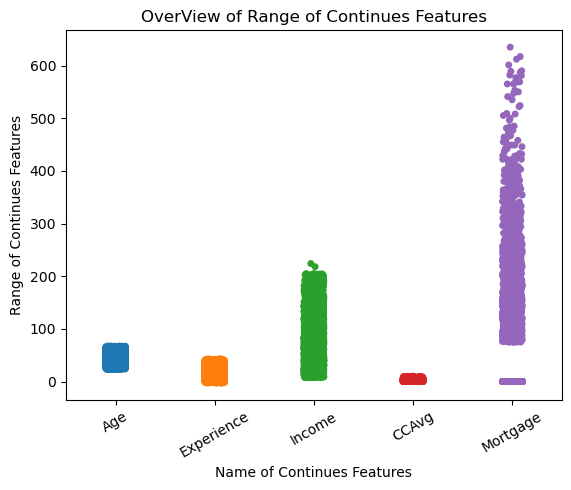

In [279]:
display(continues_col.describe().T)
ax = sns.stripplot(data=continues_col)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.ylabel('Range of Continues Features')
plt.xlabel('Name of Continues Features')
plt.title('OverView of Range of Continues Features')

#### As shown and described here there are 5 continues features 
    - Age of customers is in range(23-67)
    - Customers have experience at most 43 years
    - Income is in range (8-224)
    - CCAvg value is 10 in maximum
    - as seen above there are not Mortgage between 0 and 75, its values are 0 or in range(75,635), also we can see
    the most values are in range(0.75,400) 

In [ ]:
# Binary variables (Securities Account, CD Account, Online, CreditCard) and personal loan acceptance
binary_variables = ['Securities Account', 'CD Account', 'Online', 'CreditCard']
for var in binary_variables:
    sns.countplot(data=df, x=var, hue=df['Personal Loan'].astype(str))
    plt.title(f'{var} and Personal Loan Acceptance')
    plt.show()

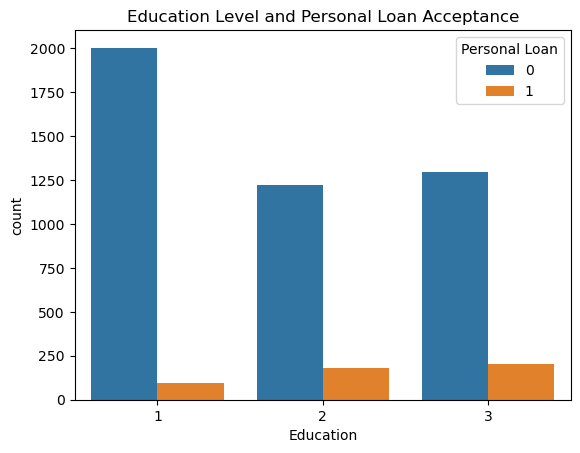

In [248]:
# Education level and personal loan acceptance
sns.countplot(data=df, x='Education', hue=df['Personal Loan'].astype(str))
plt.title('Education Level and Personal Loan Acceptance')
plt.show()

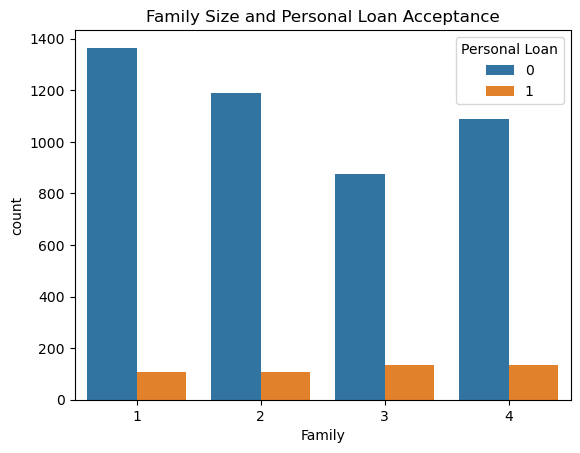

In [249]:
# Family size and personal loan acceptance
sns.countplot(data=df, x='Family', hue=df['Personal Loan'].astype(str))
plt.title('Family Size and Personal Loan Acceptance')
plt.show()

D:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



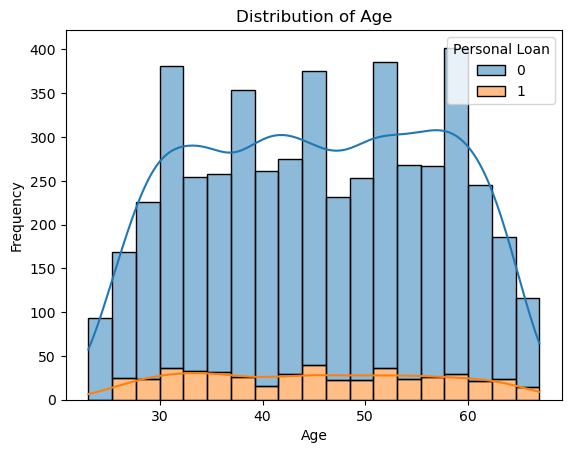

D:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



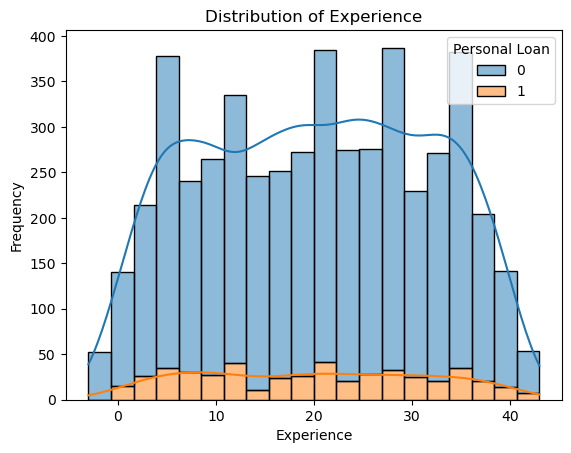

D:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



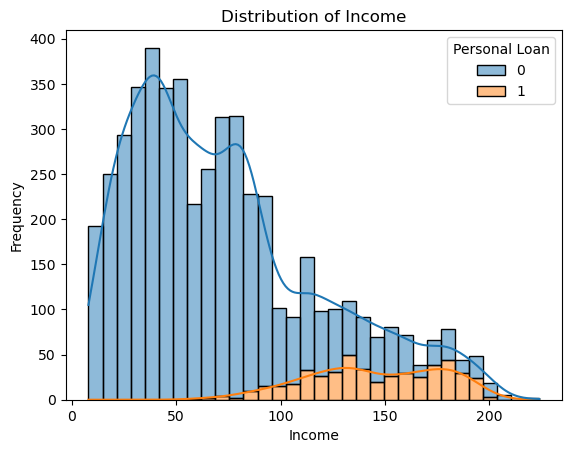

D:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



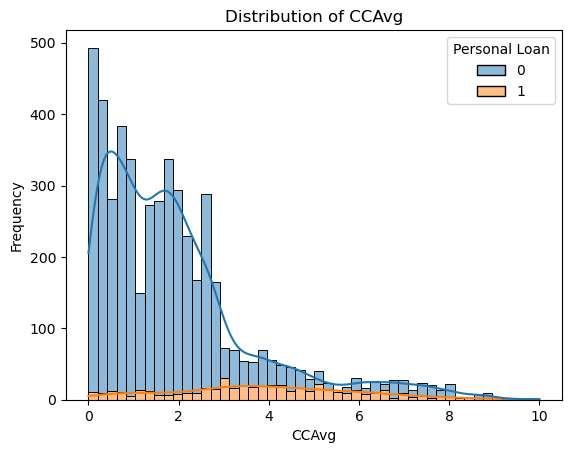

D:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



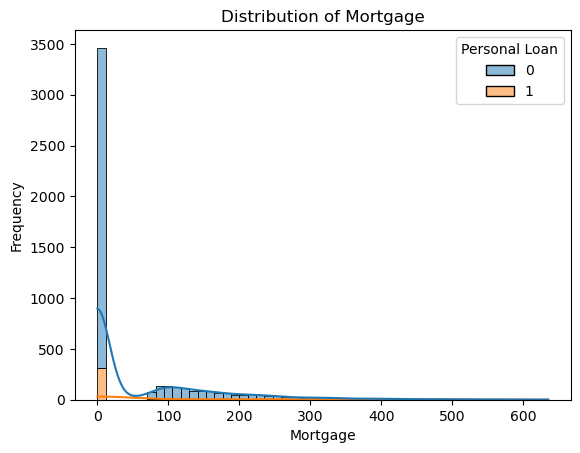

In [250]:
numerical_columns = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']

# Create histograms for each numerical column
for col in numerical_columns:
    plt.figure()
    sns.histplot(data=df, x=col,hue='Personal Loan', kde=True,multiple="stack")  # Create histogram using histplot from seaborn
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

D:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



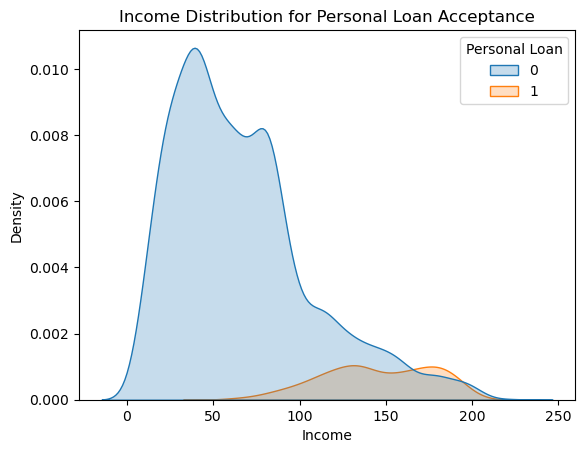

In [251]:
# KDE plot of income distribution for personal loan acceptance
sns.kdeplot(data=df, x='Income', hue=df['Personal Loan'].astype(str), fill=True)
plt.title('Income Distribution for Personal Loan Acceptance')
plt.show()

D:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



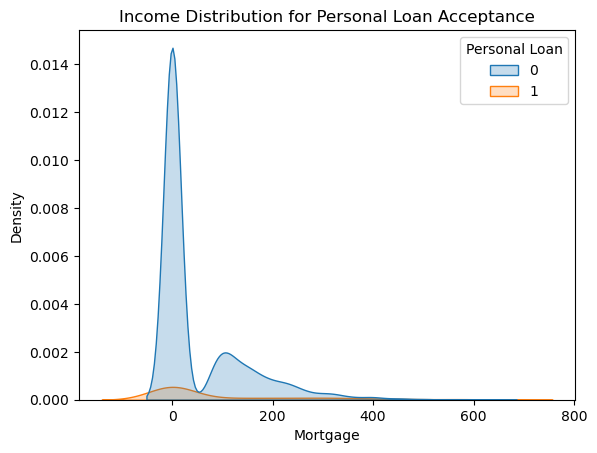

In [252]:
sns.kdeplot(data=df, x='Mortgage', hue='Personal Loan', fill=True)
plt.title('Income Distribution for Personal Loan Acceptance')
plt.show()

D:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



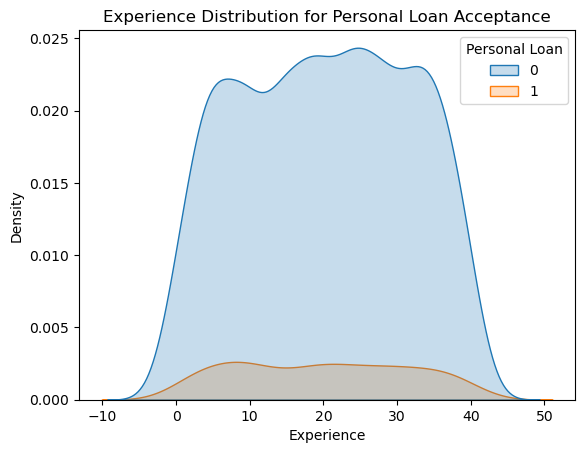

In [253]:
# KDE plot of income distribution for personal loan acceptance
sns.kdeplot(data=df, x='Experience', hue='Personal Loan', fill=True)
plt.title('Experience Distribution for Personal Loan Acceptance')
plt.show()

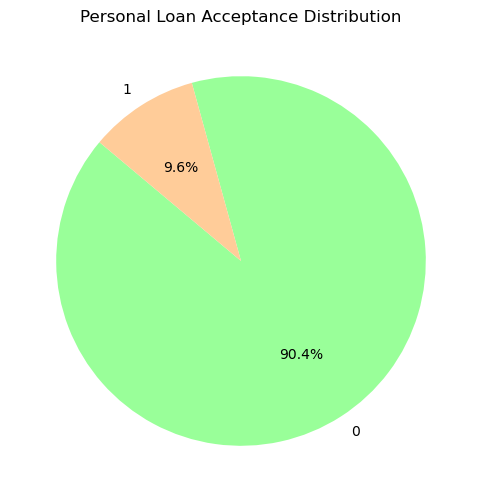

In [254]:
# Pie plot for the 'Personal Loan' column
loan_counts = df['Personal Loan'].value_counts()
plt.figure(figsize=(6, 6))
colors = ['#99ff99', '#ffcc99']
plt.pie(loan_counts, labels=loan_counts.index, autopct='%1.1f%%', startangle=140,colors=colors)
plt.title('Personal Loan Acceptance Distribution')
plt.show()

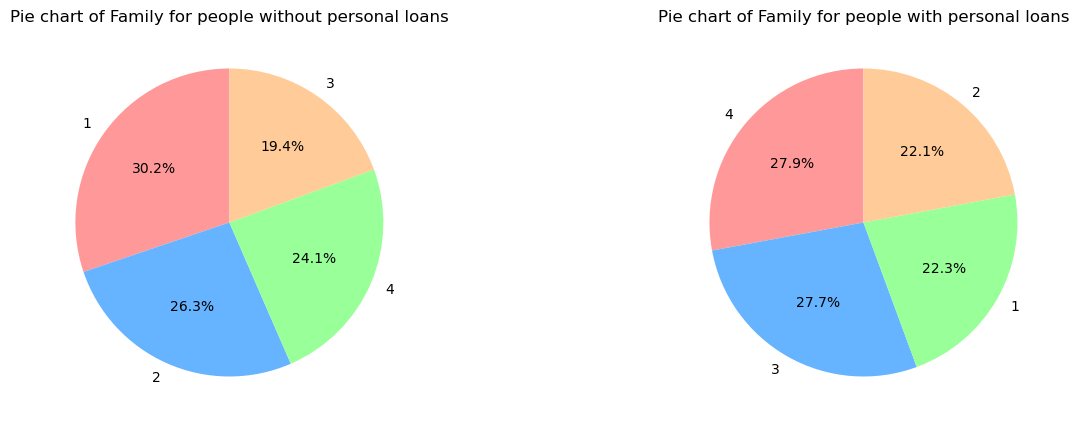

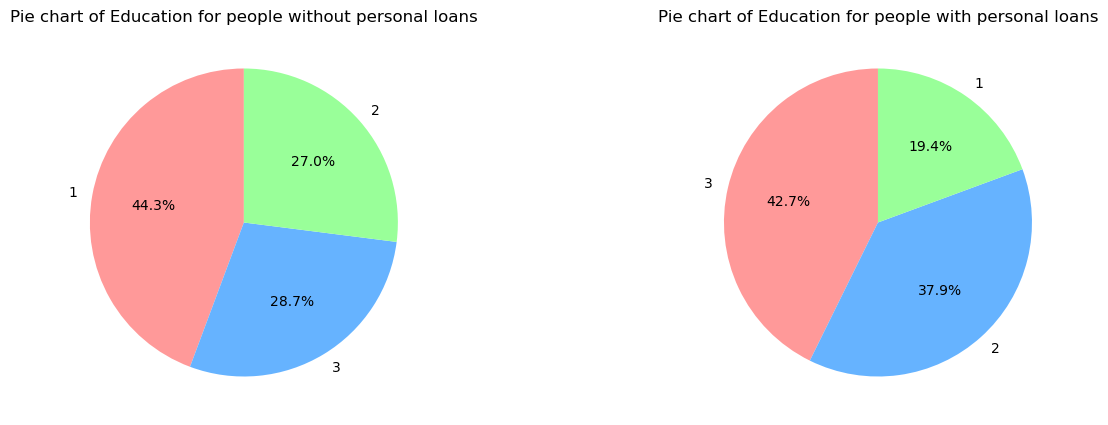

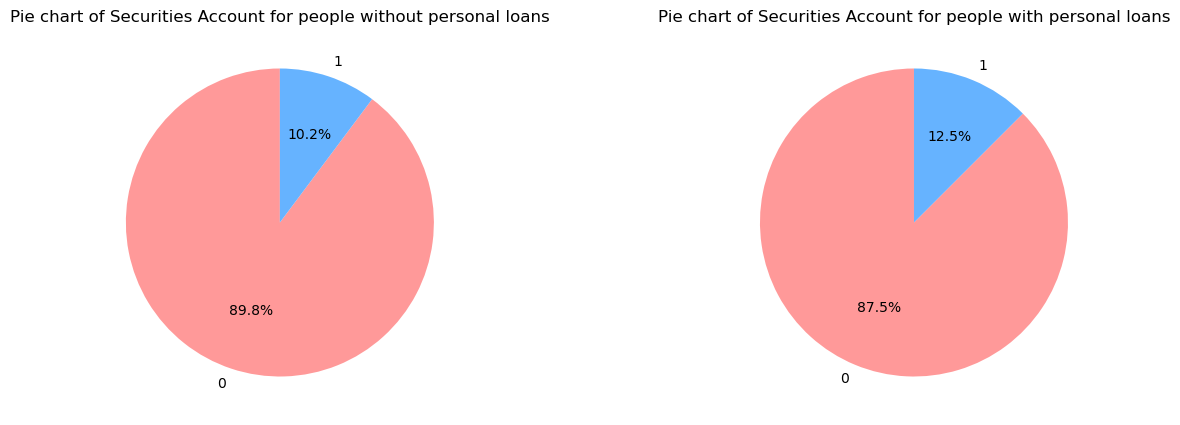

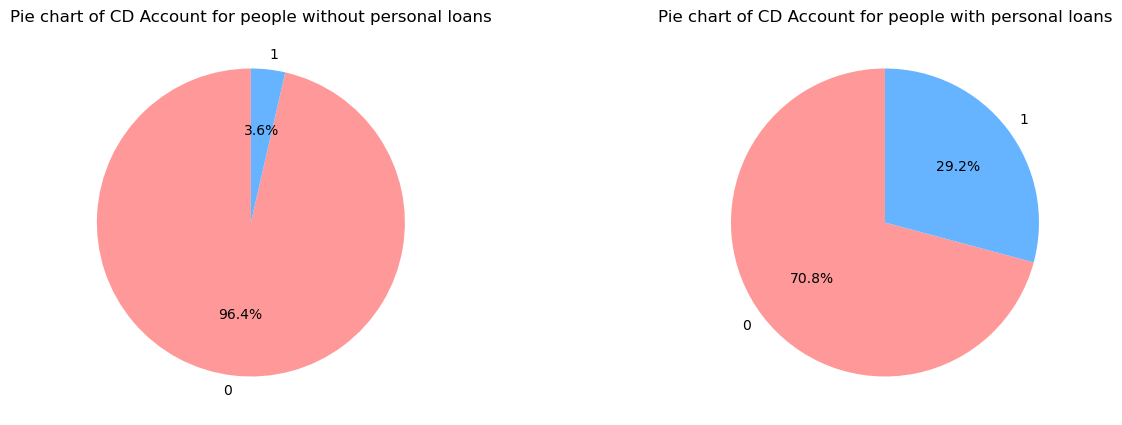

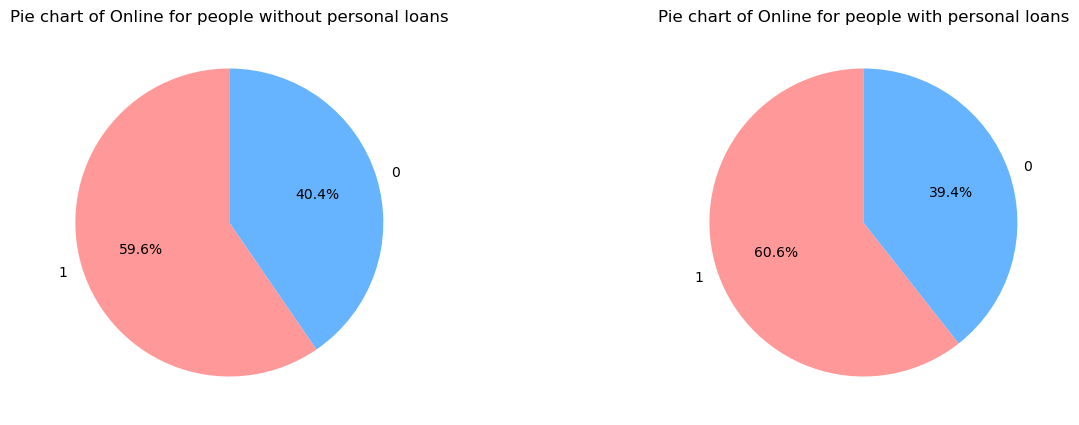

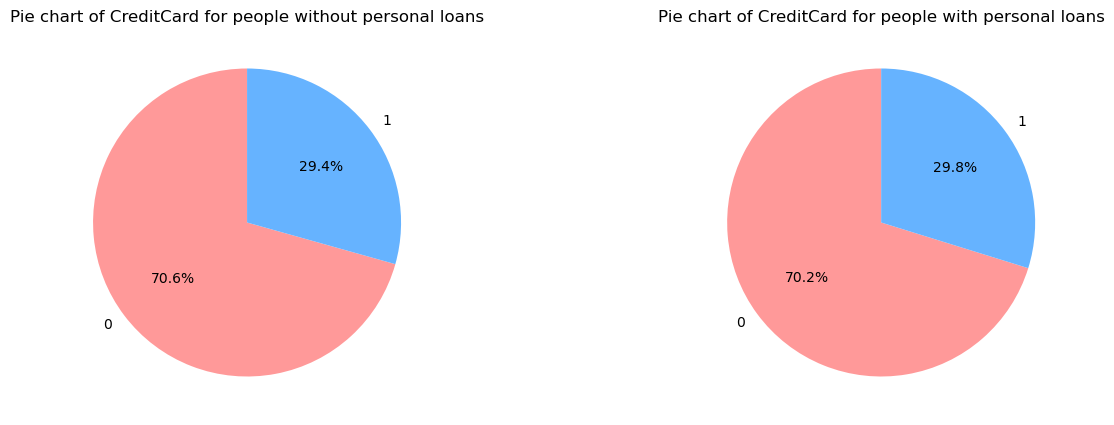

In [255]:
columns = ['Family', 'Education', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
for col in columns:
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
    counts = data[data['Personal Loan'] == 0][col].value_counts()
    counts.plot(kind='pie', subplots=True, autopct='%1.1f%%', startangle=90, legend=False,colors=colors)
    plt.title(f'Pie chart of {col} for people without personal loans')
    plt.ylabel('')
    plt.subplot(1, 2, 2)
    counts = data[data['Personal Loan'] == 1][col].value_counts()
    counts.plot(kind='pie', subplots=True, autopct='%1.1f%%', startangle=90, legend=False,colors=colors)
    plt.title(f'Pie chart of {col} for people with personal loans')
    plt.ylabel('')
    plt.show()

D:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

D:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

D:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

D:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

D:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a futu

<Figure size 800x500 with 0 Axes>

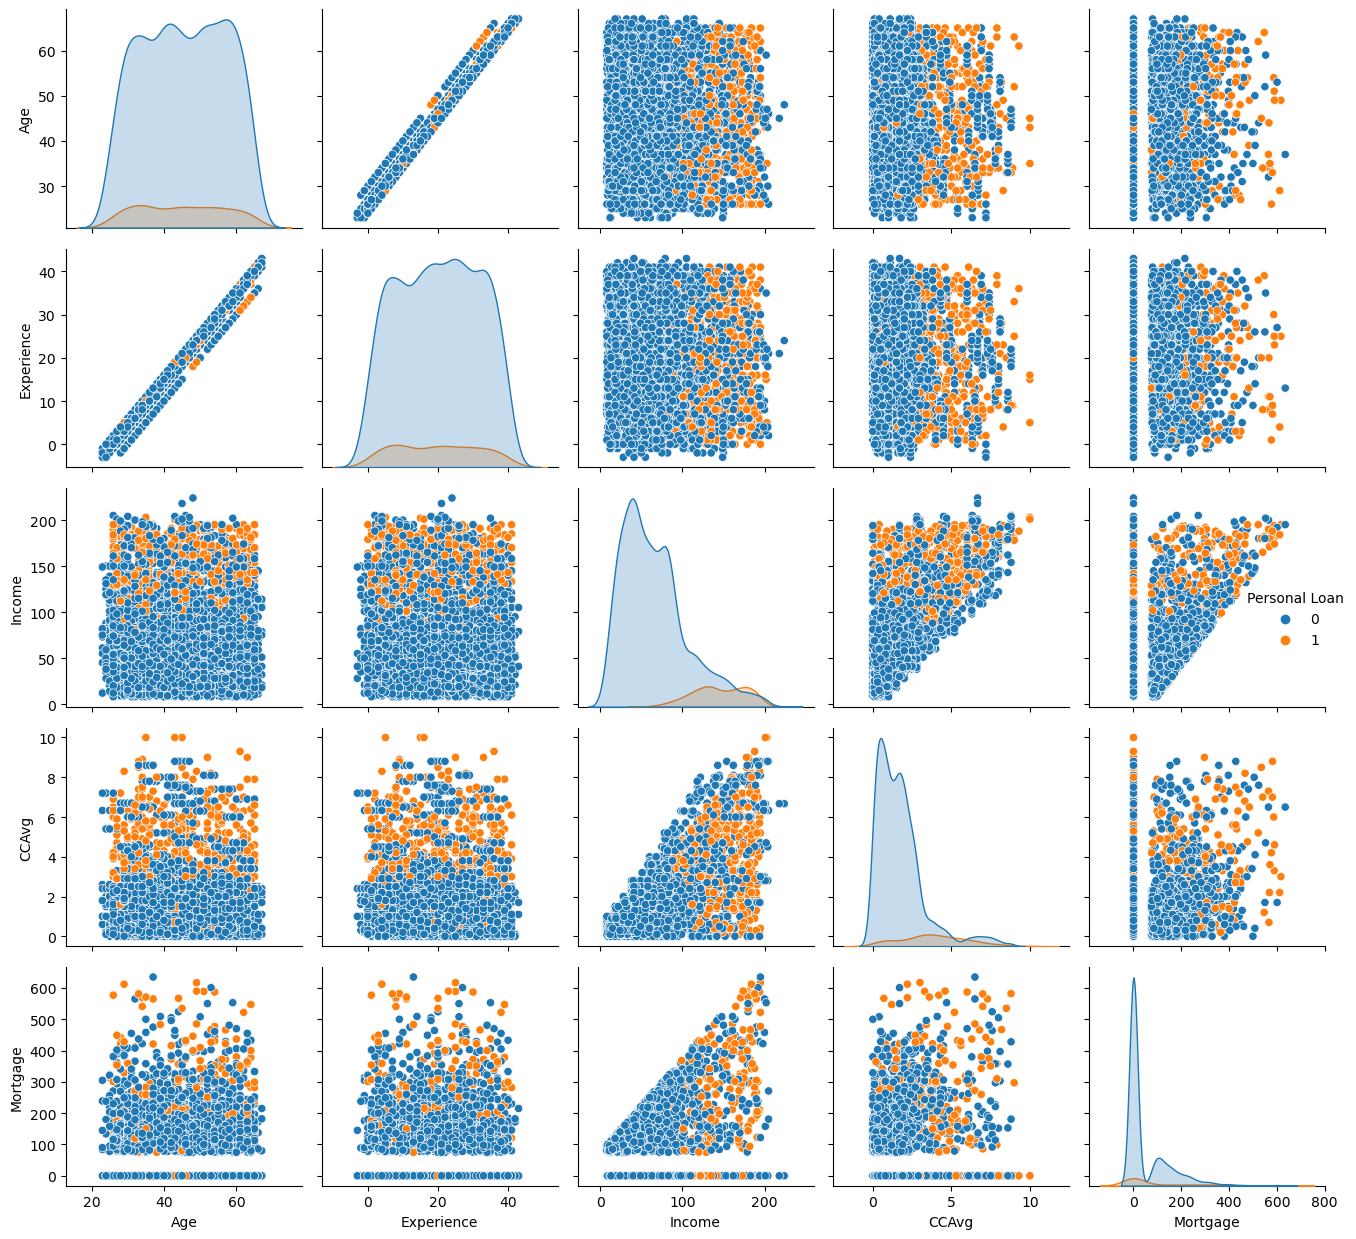

In [256]:
plt.figure(figsize=(8,5))
sns.pairplot(df[['Age','Experience','Income','CCAvg','Mortgage','Personal Loan']],hue='Personal Loan')
plt.tight_layout()
plt.show()


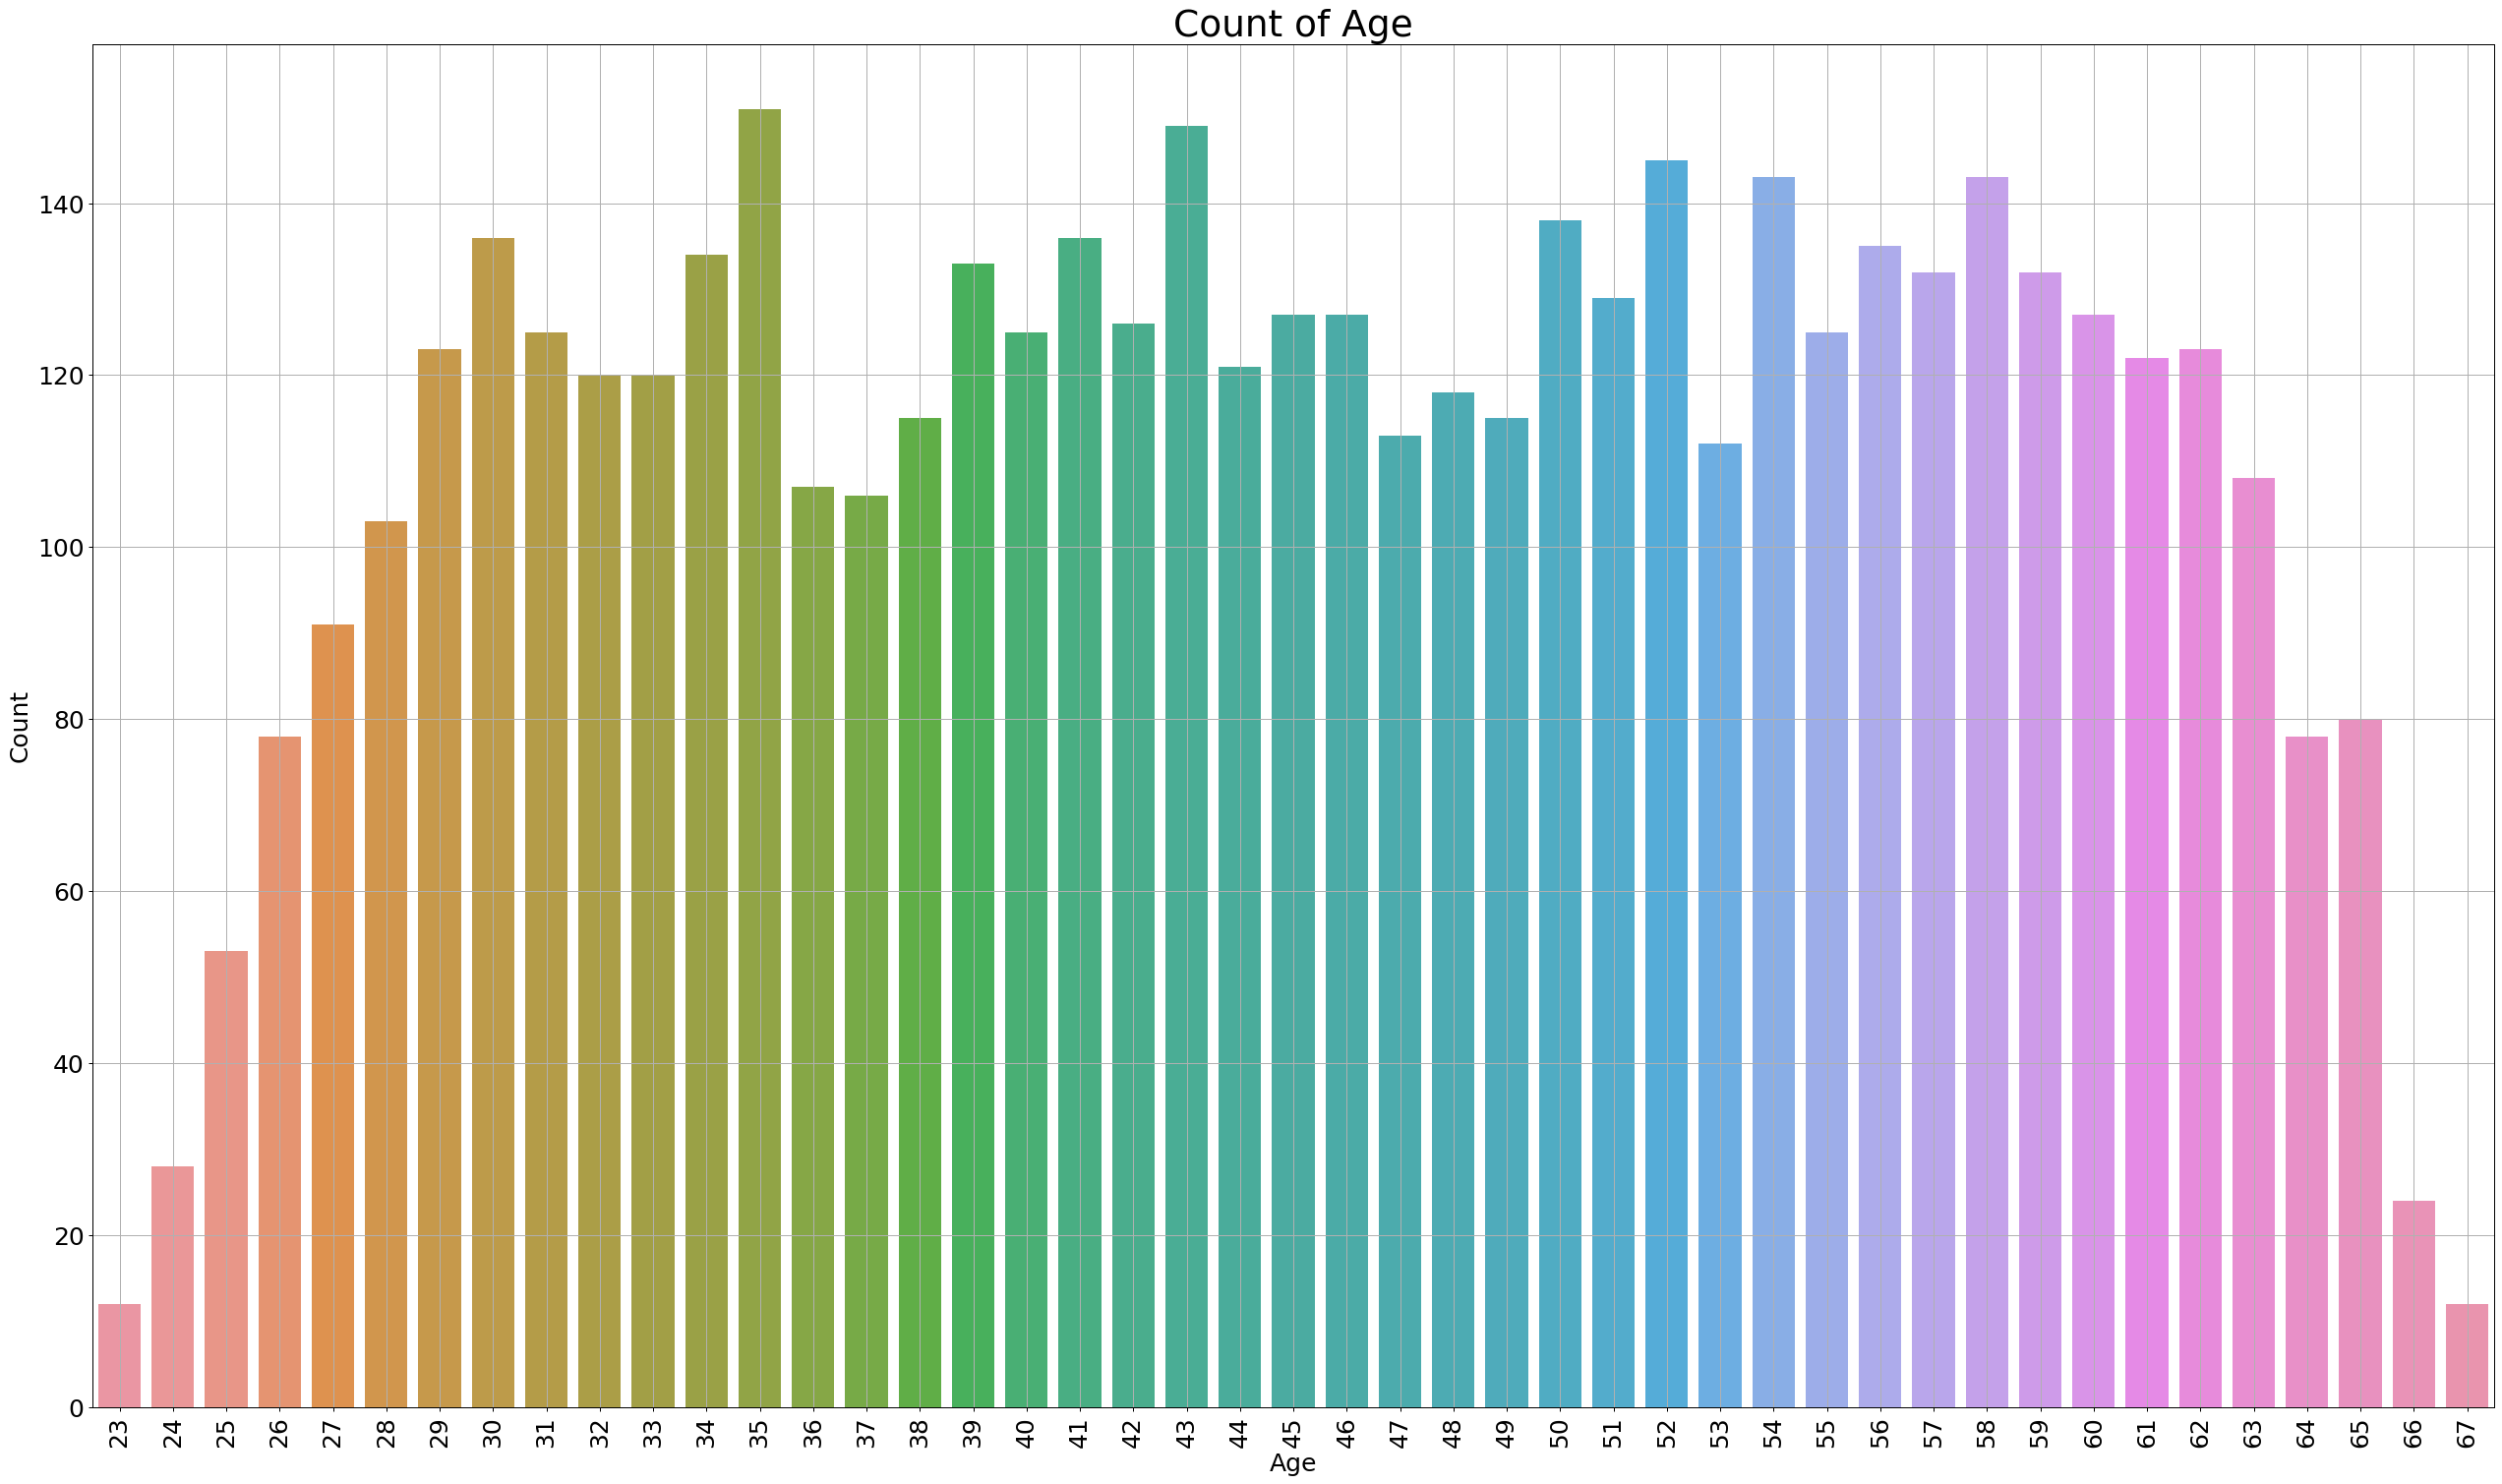

In [257]:
plt.figure(figsize=(35,20),dpi=90)
ax = sns.countplot(x="Age",data=df)
plt.xticks(rotation=90,fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Age",fontsize=20)
plt.ylabel("Count",fontsize=20)
plt.title("Count of Age" , fontsize=30)
plt.grid()

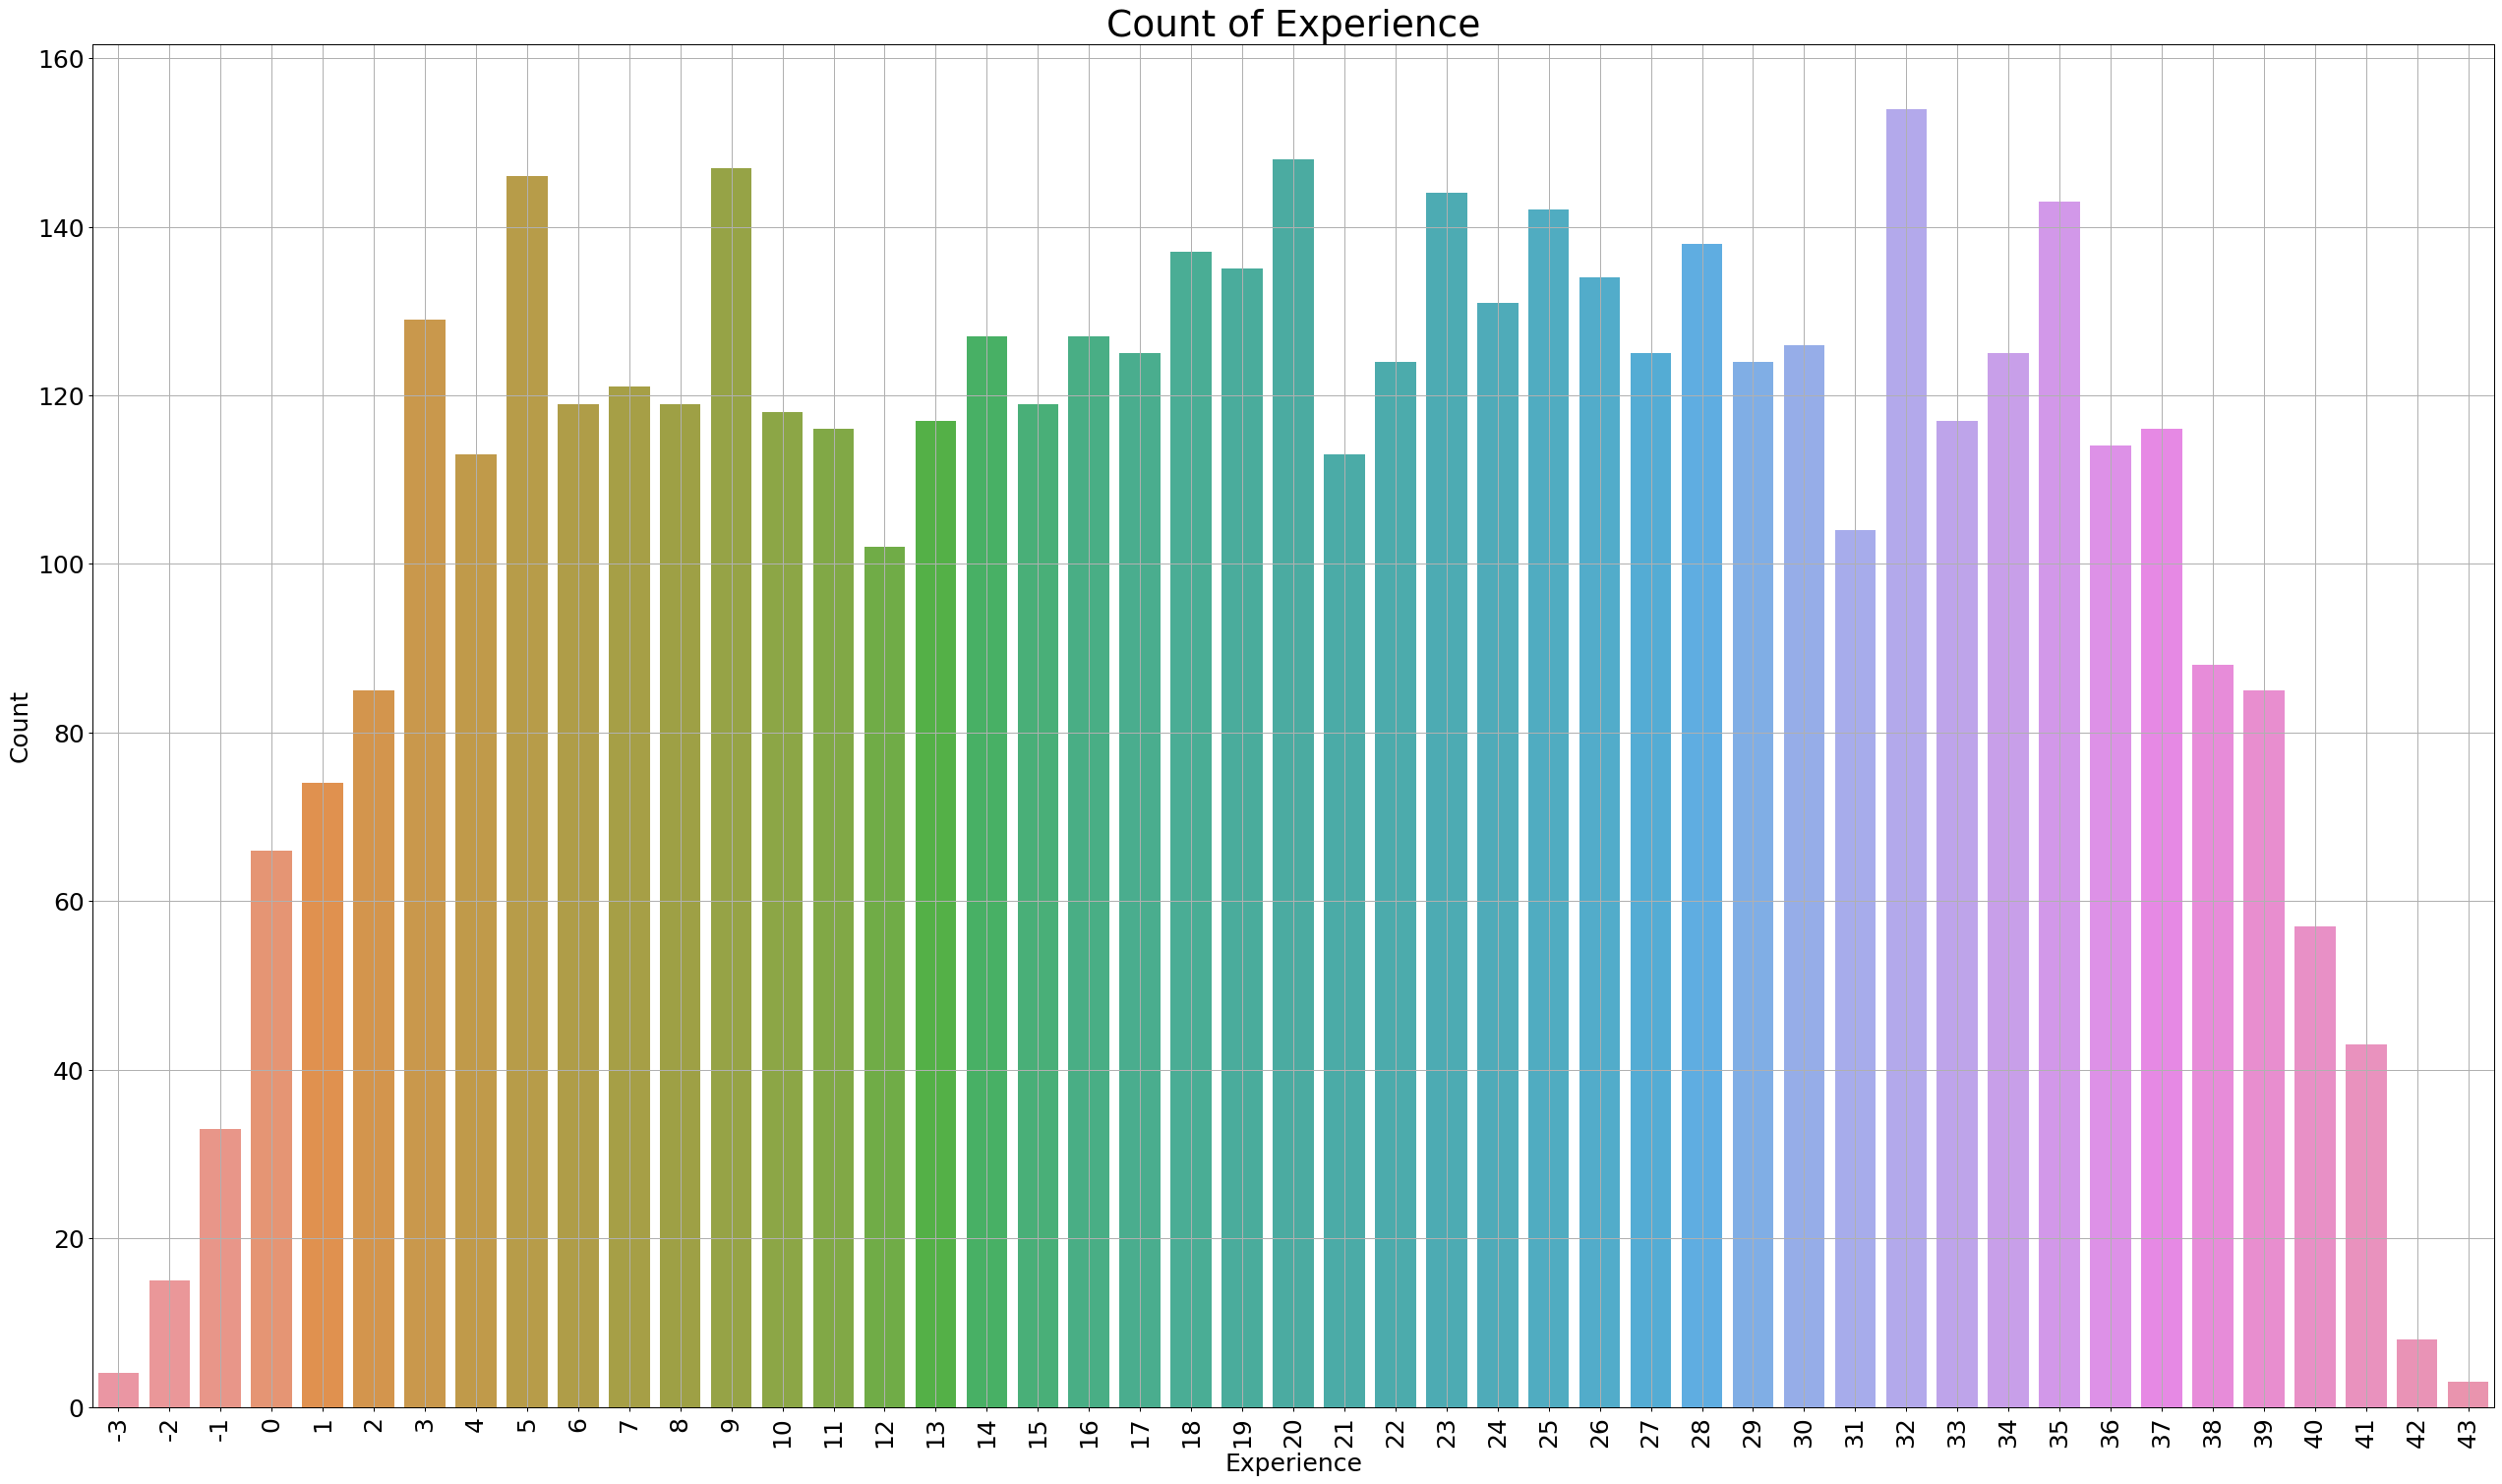

In [258]:
plt.figure(figsize=(35,20),dpi=90)
ax = sns.countplot(x="Experience",data=df)
plt.xticks(rotation=90,fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Experience",fontsize=20)
plt.ylabel("Count",fontsize=20)
plt.title("Count of Experience" , fontsize=30)
plt.grid()

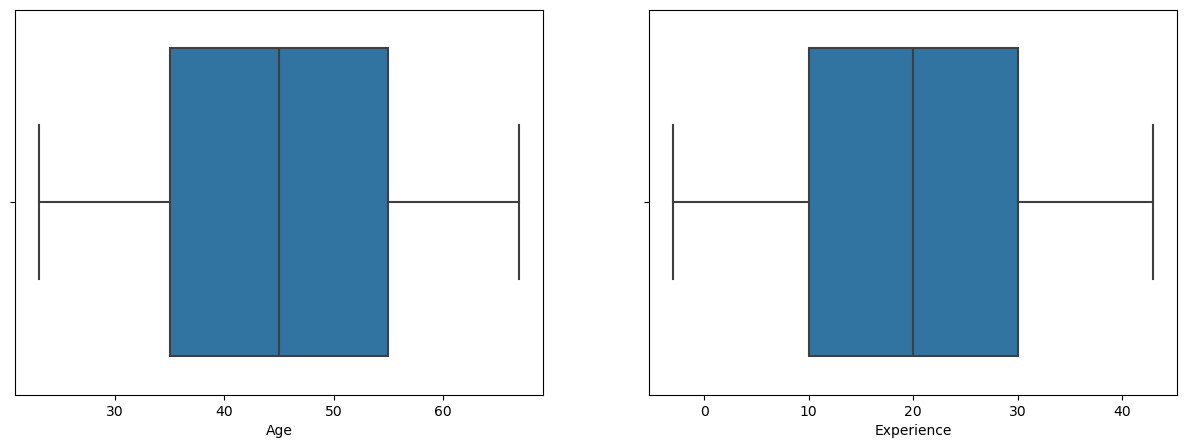

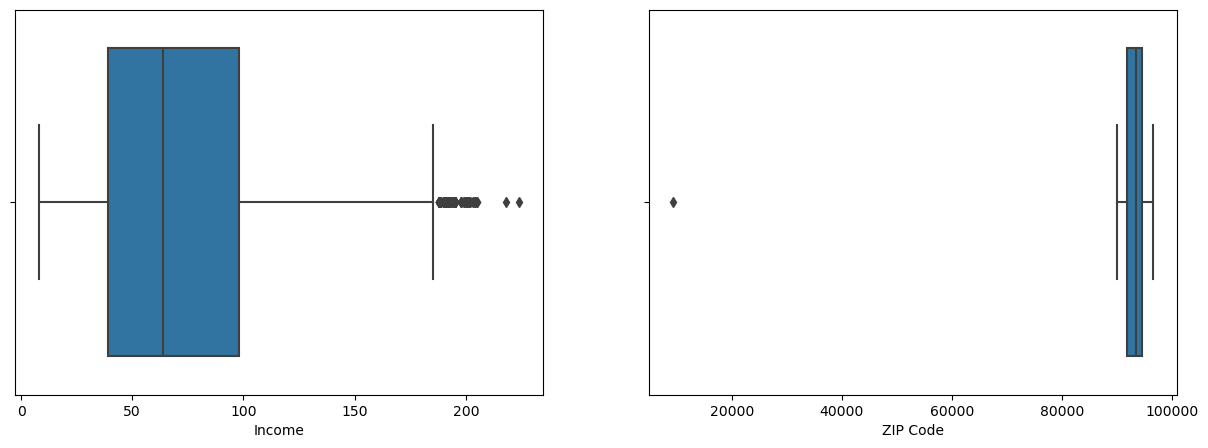

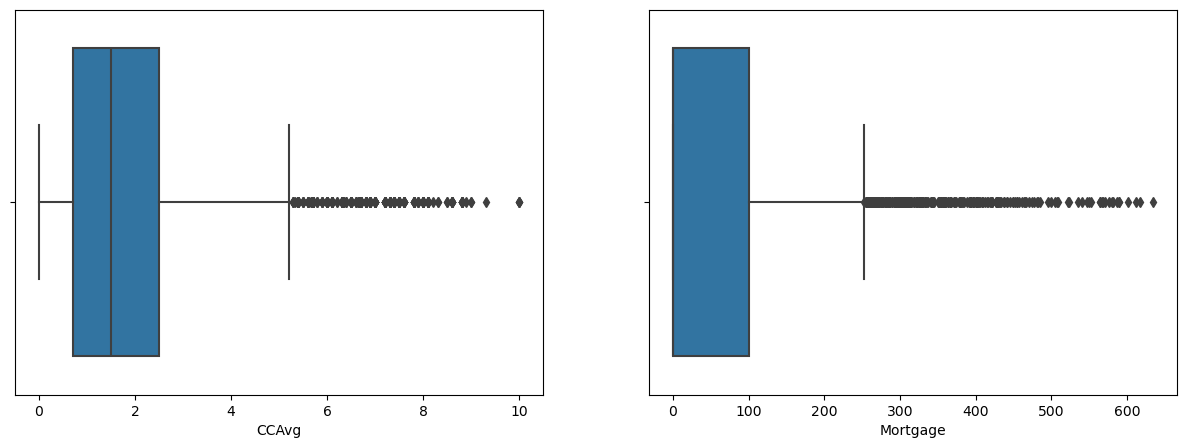

In [259]:
columns = ['Age', 'Experience', 'Income', 'ZIP Code', 'CCAvg', 'Mortgage', 'Personal Loan']
i = 0
while i < 6:
    fig = plt.figure(figsize=[15,5])
    plt.subplot(1,2,1)
    sns.boxplot(x=columns[i],data=df)
    i += 1
    plt.subplot(1,2,2)
    sns.boxplot(x=columns[i] , data=df)
    i += 1
    plt.show()

In [260]:
df1 = df.copy()

In [261]:
import pgeocode 

nomi = pgeocode.Nominatim('us')
df2 = []
df3 = []
df4 = []
df5 = []

for zipCode in df1['ZIP Code'] :
    a = nomi.query_postal_code(zipCode)
    df2.append(a['latitude'])
    df3.append(a['longitude'])
    df4.append(a['county_name'])
    df5.append(a['place_name'])
    
df1['Lat'] = pd.DataFrame(df2)
df1['Lon'] = pd.DataFrame(df3)
df1['County'] = pd.DataFrame(df4)
df1['Place'] = pd.DataFrame(df5)
df1

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Lat,Lon,County,Place
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,34.1510,-118.0889,Los Angeles,Pasadena
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,33.7866,-118.2987,Los Angeles,Los Angeles
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,37.8738,-122.2549,Alameda,Berkeley
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,37.7195,-122.4411,City and County of San Francisco,San Francisco
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,34.2283,-118.5368,Los Angeles,Northridge
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,92697,1,1.9,3,0,0,0,0,1,0,33.6485,-117.8387,Orange,Irvine
4996,30,4,15,92037,4,0.4,1,85,0,0,0,1,0,32.8455,-117.2521,San Diego,La Jolla
4997,63,39,24,93023,2,0.3,3,0,0,0,0,0,0,34.4451,-119.2565,Ventura,Ojai
4998,65,40,49,90034,3,0.5,2,0,0,0,0,1,0,34.0290,-118.4005,Los Angeles,Los Angeles


In [262]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIP Code            5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal Loan       5000 non-null   int64  
 9   Securities Account  5000 non-null   int64  
 10  CD Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
 13  Lat                 4959 non-null   float64
 14  Lon                 4959 non-null   float64
 15  County              4959 non-null   object 
 16  Place 

In [263]:
fig = px.scatter_mapbox(
    df1 ,
    lat="Lat",
    lon="Lon",
    hover_name="County",
    color = "Personal Loan",
    color_continuous_scale = ["crimson",'darkblue'],
    hover_data=['Place','Income' , 'Mortgage' , "CreditCard"],
    zoom=10,
    height=400
    
)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})
fig.update_layout(mapbox_bounds={"west": -200, "east": 80, "south": -20, "north": 90})
fig.show()

## predict data

In [357]:
df2 = df.copy()
# Assuming df is your DataFrame and 'Experience' is the name of the column you want to take the absolute value of
df2['Experience'] = df2['Experience'].abs()

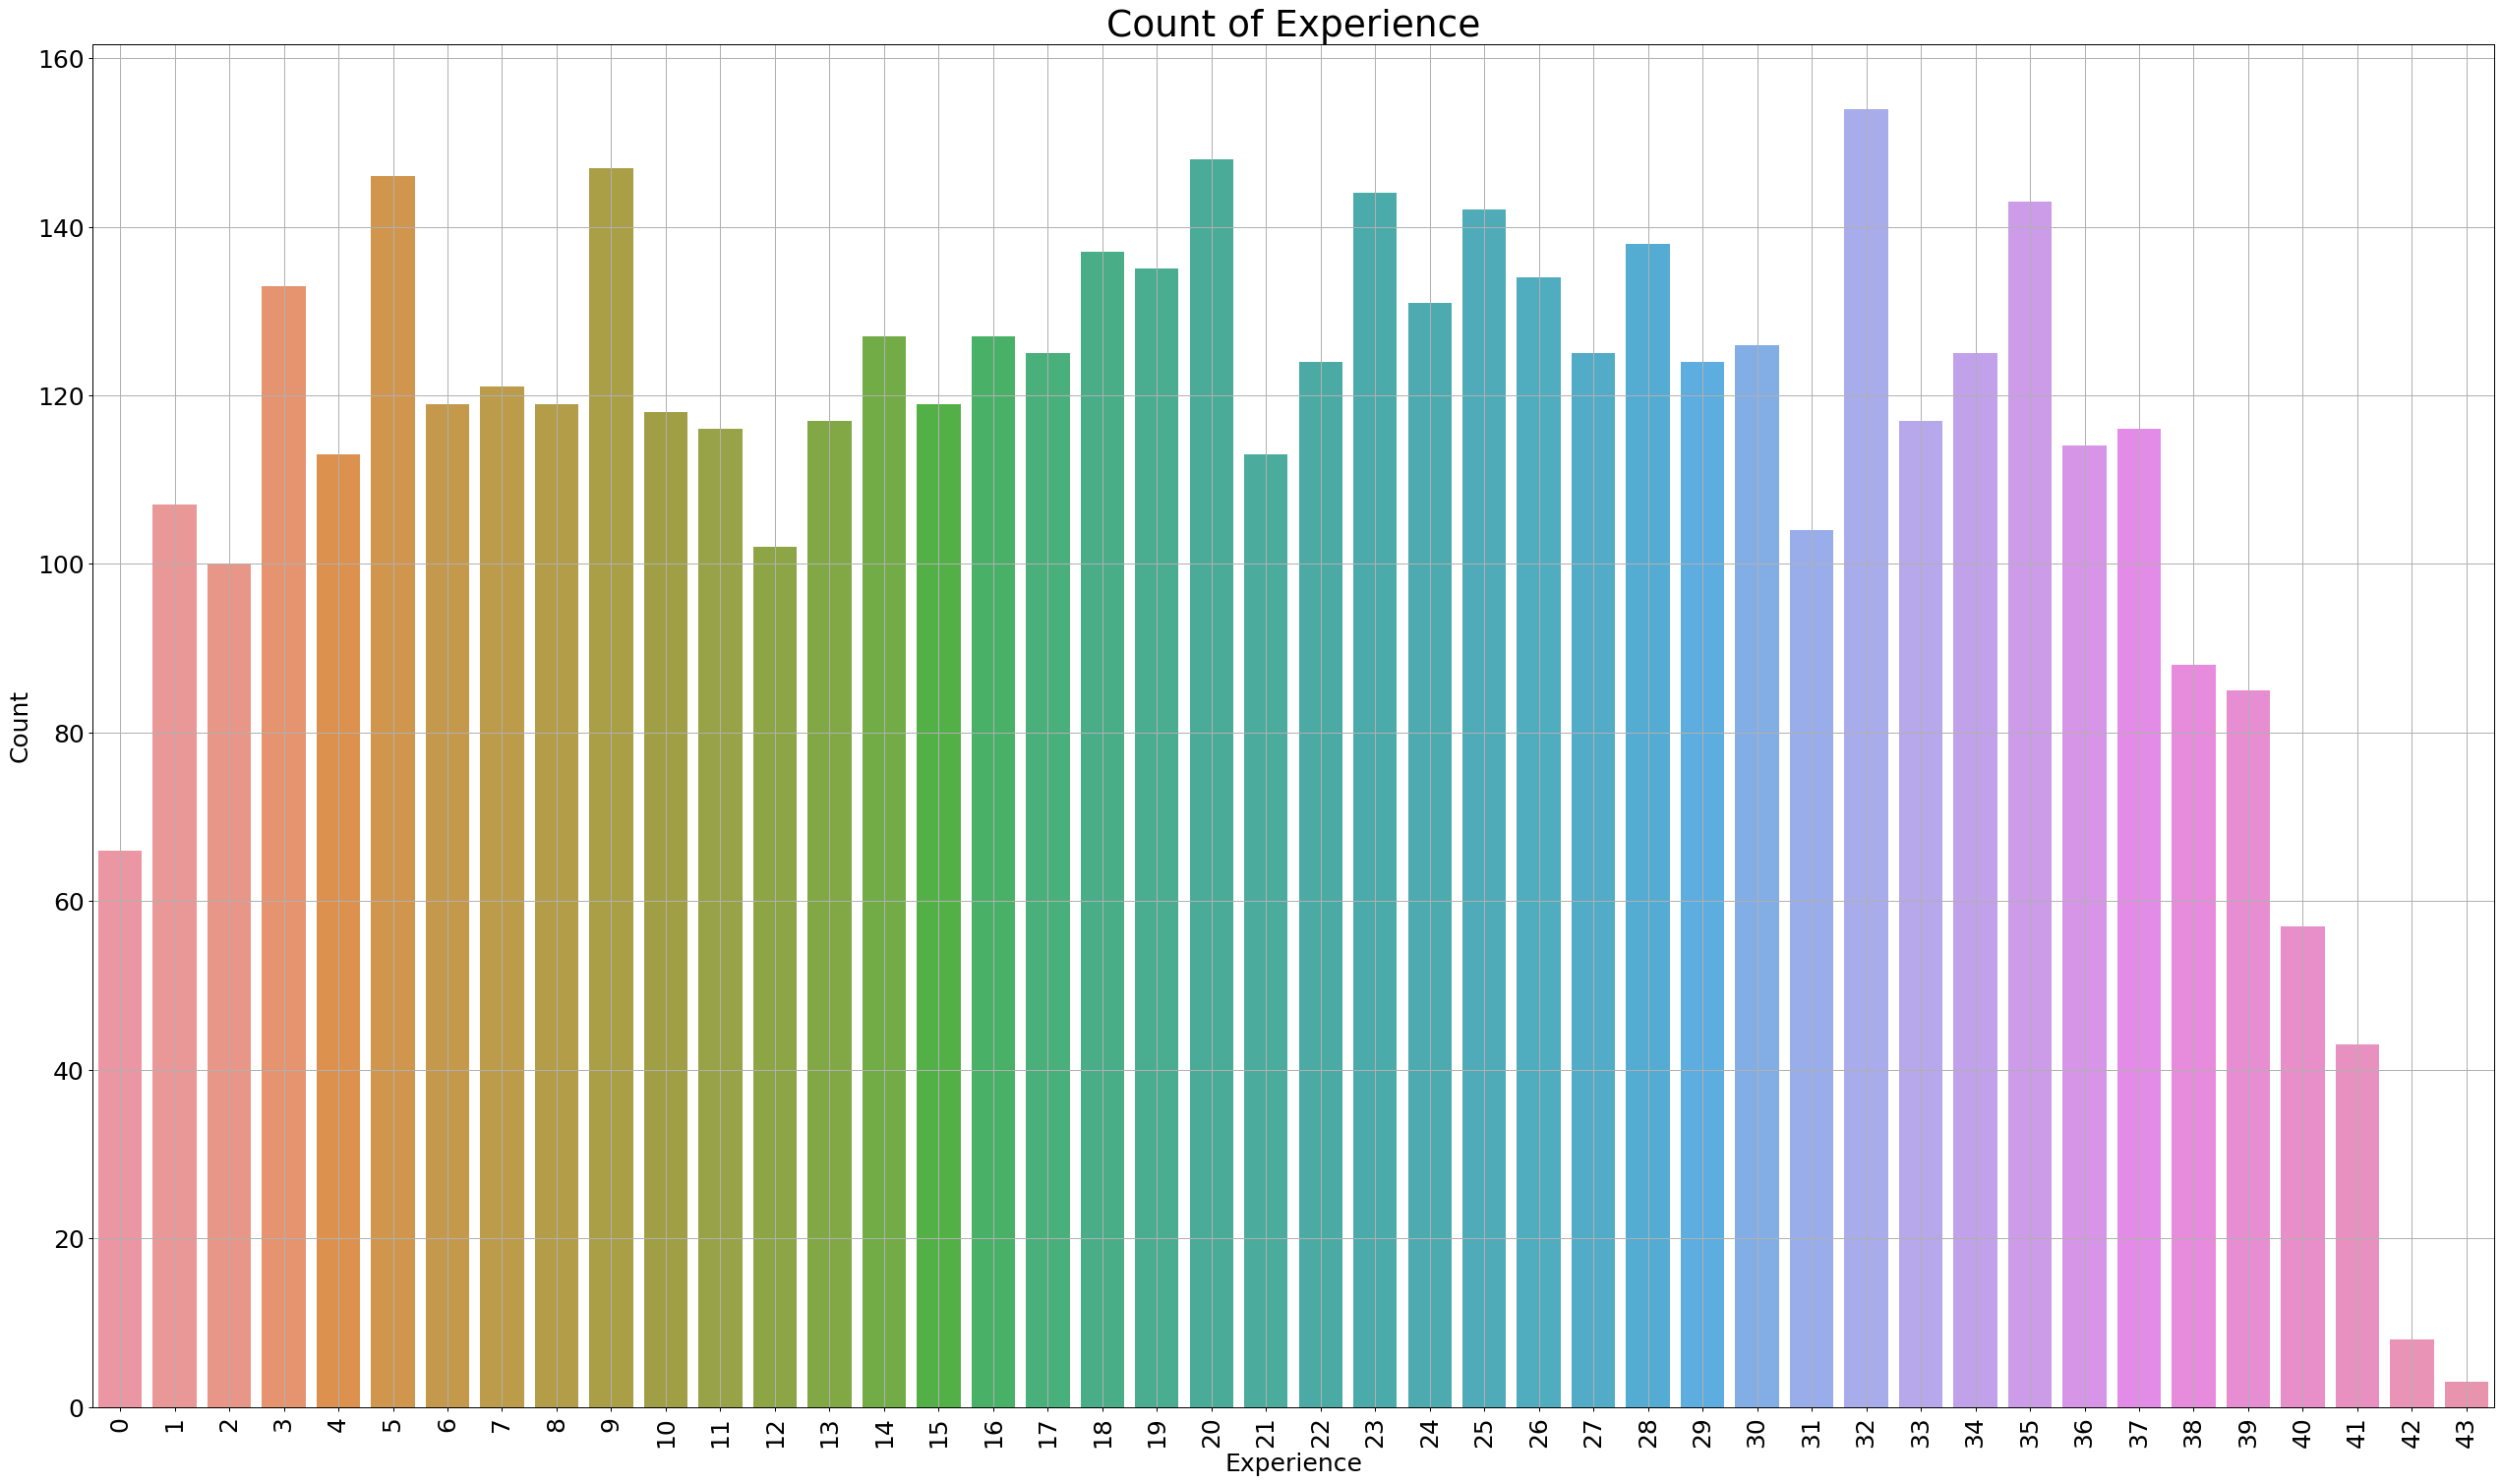

In [358]:
plt.figure(figsize=(35,20),dpi=90)
ax = sns.countplot(x="Experience",data=df2)
plt.xticks(rotation=90,fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Experience",fontsize=20)
plt.ylabel("Count",fontsize=20)
plt.title("Count of Experience" , fontsize=30)
plt.grid()

In [359]:
# convert annual income to monthly with divide by 12
df2['Income'] = round(df2['Income']/12, 2)
df2

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,4.08,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,2.83,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,0.92,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,8.33,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,3.75,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,3.33,92697,1,1.9,3,0,0,0,0,1,0
4996,30,4,1.25,92037,4,0.4,1,85,0,0,0,1,0
4997,63,39,2.00,93023,2,0.3,3,0,0,0,0,0,0
4998,65,40,4.08,90034,3,0.5,2,0,0,0,0,1,0


- Now everything is ok. There is only one small point that needs to be fixed. As it was said in section 1, the Income column expresses the annual income, while the CCAvg column expresses the Avg. spending on credit cards per month, so to standardize the units of the columns, we convert the annual income to monthly.

In [360]:
# Delete ZIP Code columns
df2.drop('ZIP Code', axis=1, inplace=True)
df2

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,4.08,4,1.6,1,0,0,1,0,0,0
1,45,19,2.83,3,1.5,1,0,0,1,0,0,0
2,39,15,0.92,1,1.0,1,0,0,0,0,0,0
3,35,9,8.33,1,2.7,2,0,0,0,0,0,0
4,35,8,3.75,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,3.33,1,1.9,3,0,0,0,0,1,0
4996,30,4,1.25,4,0.4,1,85,0,0,0,1,0
4997,63,39,2.00,2,0.3,3,0,0,0,0,0,0
4998,65,40,4.08,3,0.5,2,0,0,0,0,1,0


## normaloztion

In [361]:
##'Family','Education','Securities Account','CD Account','Online','CreditCard','Personal Loan'
columns_to_normalize = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']

scaler = MinMaxScaler()
df2[columns_to_normalize] = scaler.fit_transform(df2[columns_to_normalize])
df2

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,0.045455,0.023256,0.189444,4,0.16,1,0.000000,0,1,0,0,0
1,0.500000,0.441860,0.120000,3,0.15,1,0.000000,0,1,0,0,0
2,0.363636,0.348837,0.013889,1,0.10,1,0.000000,0,0,0,0,0
3,0.272727,0.209302,0.425556,1,0.27,2,0.000000,0,0,0,0,0
4,0.272727,0.186047,0.171111,4,0.10,2,0.000000,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.136364,0.069767,0.147778,1,0.19,3,0.000000,0,0,0,1,0
4996,0.159091,0.093023,0.032222,4,0.04,1,0.133858,0,0,0,1,0
4997,0.909091,0.906977,0.073889,2,0.03,3,0.000000,0,0,0,0,0
4998,0.954545,0.930233,0.189444,3,0.05,2,0.000000,0,0,0,1,0


In [362]:
df2.corr()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.993991,-0.055269,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.993991,1.000000,-0.046876,-0.051851,-0.049738,0.013919,-0.011097,-0.008304,-0.000989,0.009735,0.014051,0.008851
Income,-0.055269,-0.046876,1.000000,-0.157516,0.645972,-0.187518,0.206785,0.502464,-0.002616,0.169724,0.014188,-0.002386
Family,-0.046418,-0.051851,-0.157516,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052012,-0.049738,0.645972,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.041334,0.013919,-0.187518,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.011097,0.206785,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.007726,-0.008304,0.502464,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000436,-0.000989,-0.002616,0.019994,0.015086,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028
CD Account,0.008043,0.009735,0.169724,0.014110,0.136534,0.013934,0.089311,0.316355,0.317034,1.000000,0.175880,0.278644


## ...

## ...

## ...

## Model with out deleted data(KNN)

In [363]:
x = pd.DataFrame(df2 , columns = ['Age','Experience','Income',
                                 'Family','CCAvg','Education','Mortgage','Securities Account','CD Account',
                                 'Online','CreditCard']).values
y = df2['Personal Loan'].values.reshape(-1,1)
x

array([[0.04545455, 0.02325581, 0.18944444, ..., 0.        , 0.        ,
        0.        ],
       [0.5       , 0.44186047, 0.12      , ..., 0.        , 0.        ,
        0.        ],
       [0.36363636, 0.34883721, 0.01388889, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.90909091, 0.90697674, 0.07388889, ..., 0.        , 0.        ,
        0.        ],
       [0.95454545, 0.93023256, 0.18944444, ..., 0.        , 1.        ,
        0.        ],
       [0.11363636, 0.09302326, 0.34722222, ..., 0.        , 1.        ,
        1.        ]])

In [384]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import NearMiss
from imblearn.combine import SMOTETomek

In [385]:
# Define the over-sampling, under-sampling, and combined sampling techniques
smote = SMOTE(sampling_strategy=0.4, random_state=0)
nearmiss = NearMiss(sampling_strategy=0.5)
smote_tomek = SMOTETomek(sampling_strategy=0.8)

# Create a pipeline with SMOTE for over-sampling, NearMiss for under-sampling, and SMOTETomek for combined sampling
pipeline = Pipeline([('o', smote), ('u', nearmiss), ('c', smote_tomek)])

# Resample the dataset using the pipeline
x_resampled, y_resampled = pipeline.fit_resample(x, y)

# Check the new class distribution
print(pd.Series(y_resampled.flatten()).value_counts())

0    3613
1    2889
Name: count, dtype: int64


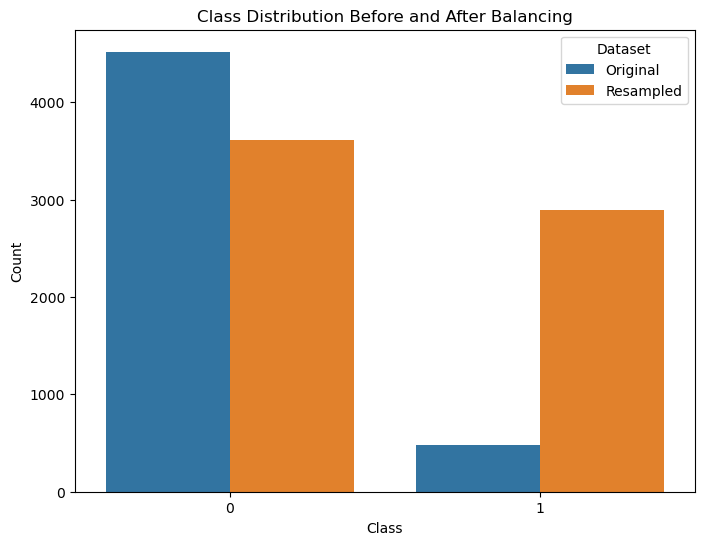

In [386]:
# Create a DataFrame with the original class distribution
class_distribution_original = pd.Series(y.flatten()).value_counts().reset_index()
class_distribution_original.columns = ['Class', 'Count']
class_distribution_original['Dataset'] = 'Original'

# Create a DataFrame with the resampled class distribution
class_distribution_resampled = pd.Series(y_resampled.flatten()).value_counts().reset_index()
class_distribution_resampled.columns = ['Class', 'Count']
class_distribution_resampled['Dataset'] = 'Resampled'

# Concatenate the two DataFrames
class_distribution = pd.concat([class_distribution_original, class_distribution_resampled])

# Plot the class distribution
plt.figure(figsize=(8, 6))
sns.barplot(x='Class', y='Count', hue='Dataset', data=class_distribution)
plt.title('Class Distribution Before and After Balancing')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [387]:
x_train , x_test , y_train , y_test = train_test_split(x_resampled, y_resampled , test_size=0.2 , random_state=0)

In [388]:
K = 20
Acc = np.zeros((K))

for i in range(1,K+1):
    clf = KNeighborsClassifier(n_neighbors = i)
    clf.fit(x_train,y_train.ravel())
    y_pred = clf.predict(x_test)
    Acc[i-1] = metrics.accuracy_score(y_test,y_pred)
    
Acc

array([0.98923905, 0.97924673, 0.97694081, 0.97232898, 0.97540354,
       0.97309762, 0.96541122, 0.96464258, 0.96233666, 0.96156802,
       0.95772483, 0.95388163, 0.95003843, 0.94619523, 0.94465796,
       0.94542659, 0.94542659, 0.94619523, 0.94465796, 0.94004612])

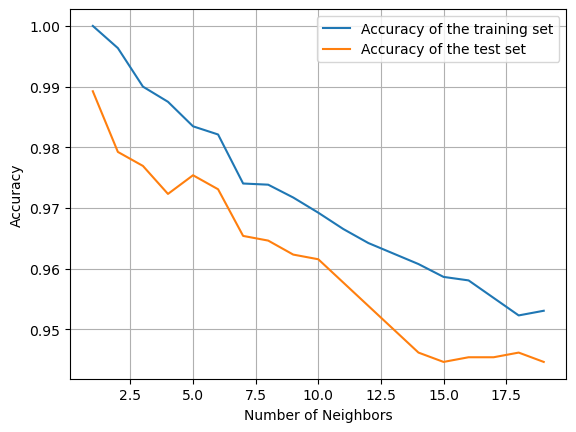

In [389]:
training_acc = []
test_acc = []

#try KNN diffrent K nearest neighbor from 1 to 15
neighbors_setting = range(1,20)

for n_neighbors in neighbors_setting:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(x_train,y_train.ravel())
    training_acc.append(knn.score(x_train,y_train))
    test_acc.append(knn.score(x_test,y_test))

plt.plot(neighbors_setting,training_acc, label='Accuracy of the training set')
plt.plot(neighbors_setting,test_acc, label='Accuracy of the test set')
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors')
plt.legend()
plt.grid()
plt.show()

In [390]:
parameters = {"n_neighbors":range(1,50)}
grid_kn = GridSearchCV(estimator = knn ,
                       param_grid = parameters, # Range of k
                       scoring = 'accuracy', # Strategy to evaluate the performance
                       # of the cross_validated model on the test set
                       cv = 5, #cross_validation 
                       verbose = 1,
                       n_jobs = -1 
                      )
grid_kn.fit(x_train,y_train.ravel())

Fitting 5 folds for each of 49 candidates, totalling 245 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=19), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 50)}, scoring='accuracy',
             verbose=1)

In [391]:
grid_kn.best_params_

{'n_neighbors': 1}

In [392]:
K = 3
clf = KNeighborsClassifier(K)
clf.fit(x_train,y_train.ravel())
y_pred = clf.predict(x_test)

In [393]:
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.9769408147578785


In [400]:
k_fold = KFold(5)
print(cross_val_score(clf,x_resampled, y_resampled.ravel(),cv=k_fold))

[0.73174481 0.98770177 0.88692308 0.97461538 0.98538462]


In [321]:
from sklearn.metrics import classification_report , confusion_matrix

In [401]:
clf.classes_

array([0, 1], dtype=int64)

In [402]:
confusion_matrix(y_resampled ,clf.predict(x_resampled))

array([[3551,   62],
       [  20, 2869]], dtype=int64)

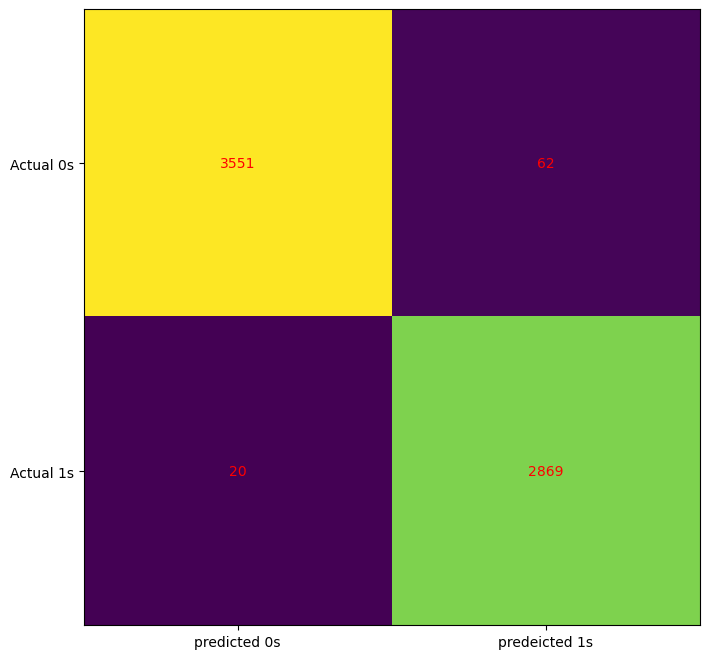

In [403]:
cm = confusion_matrix(y_resampled ,clf.predict(x_resampled))
fig ,ax = plt.subplots(figsize=(8,8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1),ticklabels=('predicted 0s' , 'predeicted 1s'))
ax.yaxis.set(ticks=(0,1),ticklabels=('Actual 0s' , 'Actual 1s'))
ax.set_ylim(1.5,-0.5)
for i in range(2):
    for j in range(2):
        ax.text(j,i,cm[i,j],ha='center',va='center',color='red')
plt.show()

1.According to the above confusion_ matrix, it can be seen that 3551 people have not received personal loans and the prediction of the model is also indicative of this.

2.Also, 2869 people have received personal loans, and the model has correctly predicted this number of received loans.

3.A total of 62 people did not actually get a personal loan, but the model wrongly recognized that they did.

4.Also, 20 people have actually received a personal loan, but the model wrongly recognized that they did not receive a loan.

In [404]:
print(classification_report(y_resampled ,clf.predict(x_resampled)))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      3613
           1       0.98      0.99      0.99      2889

    accuracy                           0.99      6502
   macro avg       0.99      0.99      0.99      6502
weighted avg       0.99      0.99      0.99      6502



In [405]:
p1 = clf.predict([[42,16,30,8,1.2,3,0,1,0,1,1]])
p1

array([1], dtype=int64)

## ...

## ...

## ...

## ...

## ...

## LogisticRegression

In [420]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [423]:
x = pd.DataFrame(df2 , columns = ['Age','Experience','Income',
                                 'Family','CCAvg','Education','Mortgage','Securities Account','CD Account',
                                 'Online','CreditCard']).values
y = df2['Personal Loan'].values.reshape(-1,1)
x

array([[0.04545455, 0.02325581, 0.18944444, ..., 0.        , 0.        ,
        0.        ],
       [0.5       , 0.44186047, 0.12      , ..., 0.        , 0.        ,
        0.        ],
       [0.36363636, 0.34883721, 0.01388889, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.90909091, 0.90697674, 0.07388889, ..., 0.        , 0.        ,
        0.        ],
       [0.95454545, 0.93023256, 0.18944444, ..., 0.        , 1.        ,
        0.        ],
       [0.11363636, 0.09302326, 0.34722222, ..., 0.        , 1.        ,
        1.        ]])

In [424]:
# Define the over-sampling, under-sampling, and combined sampling techniques
smote = SMOTE(sampling_strategy=0.4, random_state=0)
nearmiss = NearMiss(sampling_strategy=0.5)
smote_tomek = SMOTETomek(sampling_strategy=0.8)

# Create a pipeline with SMOTE for over-sampling, NearMiss for under-sampling, and SMOTETomek for combined sampling
pipeline = Pipeline([('o', smote), ('u', nearmiss), ('c', smote_tomek)])

# Resample the dataset using the pipeline
x_resampled, y_resampled = pipeline.fit_resample(x, y)

# Check the new class distribution
print(pd.Series(y_resampled.flatten()).value_counts())

0    3612
1    2888
Name: count, dtype: int64


In [425]:
x_train , x_test , y_train , y_test = train_test_split(x_resampled, y_resampled , test_size=0.2 , random_state=0)

In [426]:
logreg = LogisticRegression(solver='liblinear')
logreg.fit(x_train,y_train.ravel())
y_pred = logreg.predict(x_test)

In [427]:
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.9076923076923077


In [428]:
# Evaluate accuracy on training set
train_accuracy = logreg.score(x_train, y_train)
print("Training set accuracy:", train_accuracy)

# Evaluate accuracy on test set
test_accuracy = logreg.score(x_test, y_test)
print("Test set accuracy:", test_accuracy)

Training set accuracy: 0.9148076923076923
Test set accuracy: 0.9076923076923077


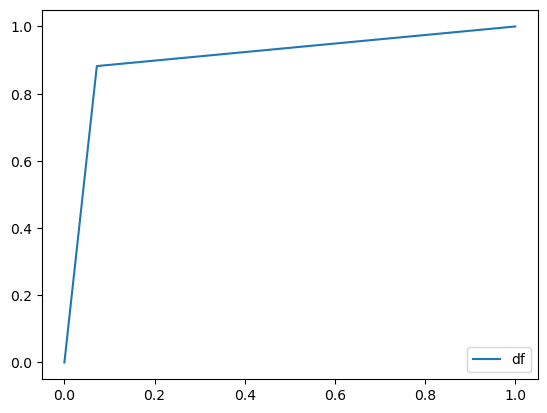

In [429]:
fpr,tpr,_=metrics.roc_curve(y_test,y_pred)
plt.plot(fpr,tpr,label='df')
plt.legend(loc=4)
plt.show()

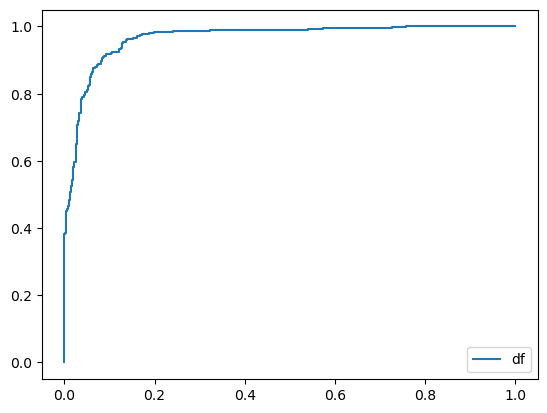

In [430]:
y_pred_proba = logreg.predict_proba(x_test)[::,1]
fpr,tpr,_=metrics.roc_curve(y_test,y_pred_proba)
plt.plot(fpr,tpr,label='df')
plt.legend(loc=4)
plt.show()

In [431]:
logreg.intercept_

array([-9.41640995])

In [432]:
logreg.coef_

array([[-0.31687385,  0.42231271, 10.96512667,  0.48003663,  1.98433638,
         1.15820554,  0.11265657, -0.34828723,  2.93100321, -0.42752506,
        -0.3923675 ]])

In [438]:
logreg.predict_proba(x_resampled)

array([[0.76786047, 0.23213953],
       [0.74232183, 0.25767817],
       [0.1900754 , 0.8099246 ],
       ...,
       [0.28290412, 0.71709588],
       [0.02602173, 0.97397827],
       [0.00661815, 0.99338185]])

In [439]:
logreg.predict(x_resampled)

array([0, 0, 1, ..., 1, 1, 1], dtype=int64)

In [440]:
logreg.score(x_resampled, y_resampled)

0.9133846153846154

In [441]:
confusion_matrix(y_resampled,logreg.predict(x_resampled))

array([[3334,  278],
       [ 285, 2603]], dtype=int64)

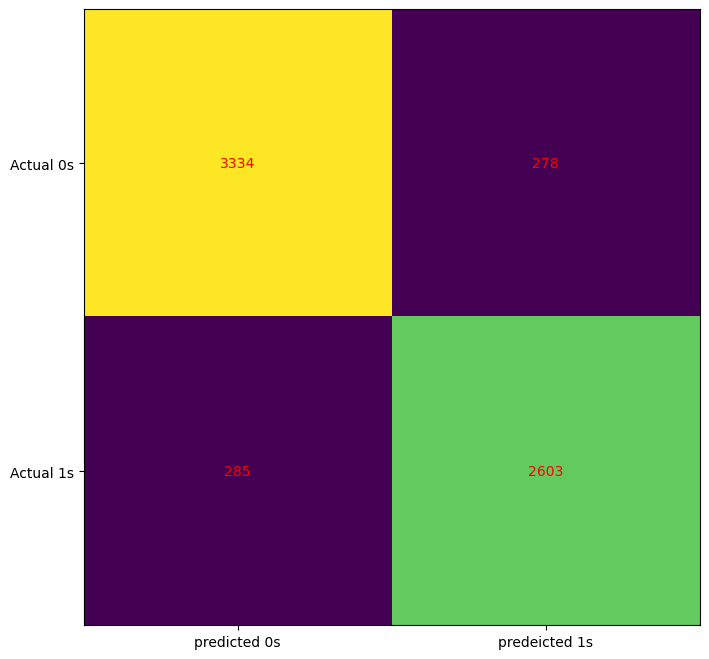

In [442]:
cm = confusion_matrix(y_resampled,logreg.predict(x_resampled))
fig ,ax = plt.subplots(figsize=(8,8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1),ticklabels=('predicted 0s' , 'predeicted 1s'))
ax.yaxis.set(ticks=(0,1),ticklabels=('Actual 0s' , 'Actual 1s'))
ax.set_ylim(1.5,-0.5)
for i in range(2):
    for j in range(2):
        ax.text(j,i,cm[i,j],ha='center',va='center',color='red')
plt.show()

In [443]:
print(classification_report(y_resampled,logreg.predict(x_resampled)))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      3612
           1       0.90      0.90      0.90      2888

    accuracy                           0.91      6500
   macro avg       0.91      0.91      0.91      6500
weighted avg       0.91      0.91      0.91      6500



In [450]:
# 'Age','Experience','Income','Family','CCAvg','Education','Mortgage','Securities Account','CD Account','Online','CreditCard'
p1 = logreg.predict([[42,16,30,3,1.2,3,0,0,1,1,1]])
p1

array([1], dtype=int64)

## ...

## ...

## ...

## ...

## ...

## ...

## ...

## Naive Bayes

In [451]:
from sklearn.naive_bayes import MultinomialNB

In [452]:
x = pd.DataFrame(df2 , columns = ['Age','Experience','Income',
                                 'Family','CCAvg','Education','Mortgage','Securities Account','CD Account',
                                 'Online','CreditCard']).values
y = df2['Personal Loan'].values.reshape(-1,1)
x

array([[0.04545455, 0.02325581, 0.18944444, ..., 0.        , 0.        ,
        0.        ],
       [0.5       , 0.44186047, 0.12      , ..., 0.        , 0.        ,
        0.        ],
       [0.36363636, 0.34883721, 0.01388889, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.90909091, 0.90697674, 0.07388889, ..., 0.        , 0.        ,
        0.        ],
       [0.95454545, 0.93023256, 0.18944444, ..., 0.        , 1.        ,
        0.        ],
       [0.11363636, 0.09302326, 0.34722222, ..., 0.        , 1.        ,
        1.        ]])

In [453]:
# Define the over-sampling, under-sampling, and combined sampling techniques
smote = SMOTE(sampling_strategy=0.4, random_state=0)
nearmiss = NearMiss(sampling_strategy=0.5)
smote_tomek = SMOTETomek(sampling_strategy=0.8)

# Create a pipeline with SMOTE for over-sampling, NearMiss for under-sampling, and SMOTETomek for combined sampling
pipeline = Pipeline([('o', smote), ('u', nearmiss), ('c', smote_tomek)])

# Resample the dataset using the pipeline
x_resampled, y_resampled = pipeline.fit_resample(x, y)

# Check the new class distribution
print(pd.Series(y_resampled.flatten()).value_counts())

0    3609
1    2885
Name: count, dtype: int64


In [454]:
x_train , x_test , y_train , y_test = train_test_split(x_resampled, y_resampled, test_size=0.2 , random_state=0)

In [455]:
clf1 = MultinomialNB()
clf1.fit(x_train,y_train.ravel())
y_pred = clf1.predict(x_test)

In [456]:
k_fold = KFold(5)
print(cross_val_score(clf1,x_resampled, y_resampled.ravel(),cv=k_fold,n_jobs=1))

[0.72517321 0.79830639 0.51270208 0.29561201 0.30970724]


In [457]:
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.6820631254811393


In [458]:
# Evaluate accuracy on training set
train_accuracy = clf1.score(x_train, y_train)
print("Training set accuracy:", train_accuracy)

# Evaluate accuracy on test set
test_accuracy = clf1.score(x_test, y_test)
print("Test set accuracy:", test_accuracy)

Training set accuracy: 0.6768046198267565
Test set accuracy: 0.6820631254811393


In [460]:
confusion_matrix(y_resampled,clf1.predict(x_resampled))

array([[3276,  333],
       [1759, 1126]], dtype=int64)

In [461]:
print(classification_report(y_resampled,clf1.predict(x_resampled)))

              precision    recall  f1-score   support

           0       0.65      0.91      0.76      3609
           1       0.77      0.39      0.52      2885

    accuracy                           0.68      6494
   macro avg       0.71      0.65      0.64      6494
weighted avg       0.70      0.68      0.65      6494



In [462]:
p1 = clf1.predict([[42,16,30,8,1.2,3,0,1,0,1,1]])
p1

array([1], dtype=int64)

## ...

## ...

## ...

## ...

-As you can see, the Naive Bayes algorithm does not perform well on this dataset. Most Naive Bayes algorithms are more suitable for discrete datasets. Therefore, it is better to first convert all the features of your dataset into discrete features and then apply various Naive Bayes algorithms that are suitable for discrete data to the dataset